In [1]:
import os
import sys
import random
from skimage.io import imread,imshow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Reshape, Permute, Activation, Input,add, multiply
from keras.layers import concatenate, core, Dropout
from keras.models import Model

from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.core import Lambda
import keras.backend as K

seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

ModuleNotFoundError: No module named 'keras'

In [2]:
image_size = 128
train_path = "../input/patch-norm"      #defining directories
image_patch="../input/patch-norm/images" 
epochs = 500
batch_size = 16

## Training Ids
train_ids = next(os.walk(image_patch))[2]
valid_ids = train_ids[952:1224]
test_ids = train_ids[1224:1264]
train_ids = train_ids[0:952] 

In [3]:
train_ids=['09-1339-02-4_7.bmp', '09-1339-01-3_3.bmp', '10-15247-02-1_3.bmp', '10-12813-05-1_10.bmp', '09-1646-01-1_16.bmp', '10-13799-01-2_5.bmp', '09-322-02-3_4.bmp', '10-13799-06-1_11.bmp', '09-1339-01-3_13.bmp', '09-1646-05-3_10.bmp', '09-23232-02-1_15.bmp', '09-322-02-4_11.bmp', '10-15247-02-4_3.bmp', '09-23232-02-2_13.bmp', '10-12813-05-1_6.bmp', '09-1646-02-4_7.bmp', '09-1646-02-2_11.bmp', '10-13799-01-4_4.bmp', '10-13799-01-2_11.bmp', '09-16566-03-1_3.bmp', '10-12813-01-2_3.bmp', '09-23232-02-3_8.bmp', '09-1646-02-3_12.bmp', '09-1339-05-2_2.bmp', '09-16566-03-3_1.bmp', '10-13799-05-2_7.bmp', '09-16566-02-3_8.bmp', '09-1646-01-4_10.bmp', '09-322-02-4_5.bmp', '09-1646-03-3_12.bmp', '09-23757-01-1_13.bmp', '10-13799-02-3_8.bmp', '09-21631-03-4_10.bmp', '09-1339-01-4_6.bmp', '09-1646-01-3_6.bmp', '10-13799-05-1_11.bmp', '09-16566-02-3_4.bmp', '09-322-02-4_1.bmp', '10-13799-02-1_2.bmp', '09-1339-05-1_9.bmp', '10-13799-02-3_7.bmp', '09-1646-05-1_10.bmp', '09-1339-02-3_2.bmp', '09-16566-03-4_1.bmp', '09-322-02-2_8.bmp', '09-16566-03-2_6.bmp', '10-13799-06-3_8.bmp', '10-13799-01-3_1.bmp', '10-15247-02-1_4.bmp', '10-13799-06-1_13.bmp', '09-1646-03-1_14.bmp', '09-23757-01-1_8.bmp', '09-322-02-1_16.bmp', '09-1646-05-4_3.bmp', '09-1646-03-1_3.bmp', '10-13799-06-3_6.bmp', '09-1339-01-3_9.bmp', '09-1646-02-2_6.bmp', '09-21631-03-1_15.bmp', '10-12813-05-4_10.bmp', '09-16566-02-2_6.bmp', '09-21631-03-3_2.bmp', '09-322-02-3_16.bmp', '09-16566-02-1_9.bmp', '10-13799-01-4_7.bmp', '10-13799-02-2_3.bmp', '09-23757-01-2_12.bmp', '09-1646-03-4_3.bmp', '09-16566-02-4_14.bmp', '09-1646-02-2_5.bmp', '09-1646-01-1_7.bmp', '09-23232-02-1_10.bmp', '09-1646-01-1_3.bmp', '10-13799-02-1_1.bmp', '09-16566-03-1_4.bmp', '09-21631-03-1_6.bmp', '10-13799-05-2_6.bmp', '09-1339-01-2_1.bmp', '09-16566-02-1_13.bmp', '09-1339-01-2_15.bmp', '09-322-02-2_2.bmp', '09-16566-03-2_14.bmp', '09-1339-01-3_6.bmp', '10-13799-05-1_7.bmp', '10-13799-06-2_14.bmp', '09-1646-03-3_9.bmp', '10-13799-01-4_15.bmp', '09-1339-02-1_15.bmp', '09-1339-05-1_16.bmp', '09-23757-01-1_16.bmp', '09-21631-03-2_9.bmp', '10-15247-02-2_1.bmp', '10-12813-01-3_10.bmp', '10-13799-06-2_6.bmp', '09-1339-01-4_12.bmp', '09-1646-01-3_14.bmp', '09-1646-01-3_5.bmp', '09-322-02-4_12.bmp', '09-21631-03-1_14.bmp', '10-13799-05-2_2.bmp', '10-15247-02-2_13.bmp', '09-1646-02-2_16.bmp', '10-13799-01-1_9.bmp', '09-1339-05-2_6.bmp', '10-15247-02-1_1.bmp', '09-1646-01-2_3.bmp', '09-16566-03-2_1.bmp', '09-1339-05-2_11.bmp', '10-13799-05-4_8.bmp', '09-1339-02-3_5.bmp', '09-21631-03-2_13.bmp', '09-1646-02-2_14.bmp', '09-23232-02-3_3.bmp', '10-12813-01-1_13.bmp', '09-1339-02-2_9.bmp', '09-1339-02-2_15.bmp', '09-1339-05-1_3.bmp', '09-1646-03-2_7.bmp', '09-1646-02-2_3.bmp', '10-12813-01-2_7.bmp', '10-12813-05-3_6.bmp', '09-1646-05-1_13.bmp', '09-1646-03-4_11.bmp', '10-15247-02-3_5.bmp', '10-13799-02-2_4.bmp', '10-13799-06-3_11.bmp', '10-12813-01-3_15.bmp', '10-15247-02-2_8.bmp', '10-15247-02-3_4.bmp', '10-12813-01-1_9.bmp', '09-1646-02-1_3.bmp', '09-16566-02-4_3.bmp', '09-1339-02-4_11.bmp', '09-322-02-1_3.bmp', '10-13799-01-1_6.bmp', '09-23232-02-4_5.bmp', '09-322-02-2_7.bmp', '09-1646-03-1_5.bmp', '10-15247-02-4_12.bmp', '09-1646-01-4_4.bmp', '10-13799-01-2_1.bmp', '09-1339-05-3_1.bmp', '10-12813-01-4_12.bmp', '09-1339-02-1_16.bmp', '10-13799-02-4_8.bmp', '09-322-02-4_14.bmp', '09-322-02-2_16.bmp', '10-13799-01-1_16.bmp', '09-16566-02-1_4.bmp', '10-13799-05-1_14.bmp', '09-1646-02-1_5.bmp', '09-23757-01-3_6.bmp', '09-1339-02-3_3.bmp', '09-21631-03-2_16.bmp', '09-1646-03-3_1.bmp', '10-13799-02-1_15.bmp', '09-1339-01-3_5.bmp', '09-1339-01-4_5.bmp', '10-12813-01-4_10.bmp', '10-13799-01-4_6.bmp', '09-16566-02-4_7.bmp', '09-23757-01-2_5.bmp', '09-1646-02-1_14.bmp', '10-13799-01-2_9.bmp', '09-16566-03-1_5.bmp', '09-1339-05-1_14.bmp', '09-1339-01-1_9.bmp', '09-1646-01-2_11.bmp', '10-13799-06-4_4.bmp', '09-322-02-4_6.bmp', '10-12813-01-1_8.bmp', '09-1339-02-2_6.bmp', '09-16566-02-3_11.bmp', '10-12813-05-3_3.bmp', '09-1339-02-1_2.bmp', '09-1646-03-3_10.bmp', '09-16566-03-2_13.bmp', '09-16566-02-2_3.bmp', '10-12813-01-3_13.bmp', '09-1646-05-2_13.bmp', '09-1646-02-3_7.bmp', '09-1339-02-2_4.bmp', '09-1339-01-1_2.bmp', '09-1339-01-4_13.bmp', '10-13799-02-2_15.bmp', '09-1339-01-2_2.bmp', '09-1339-05-4_2.bmp', '10-15247-02-2_4.bmp', '09-1646-05-4_2.bmp', '10-12813-05-3_16.bmp', '10-15247-02-1_11.bmp', '09-1339-05-3_8.bmp', '09-1646-05-1_9.bmp', '09-23757-01-2_4.bmp', '10-12813-05-3_5.bmp', '09-16566-03-3_12.bmp', '09-322-02-2_15.bmp', '09-1339-02-1_10.bmp', '09-1339-05-4_11.bmp', '09-1339-02-3_1.bmp', '09-1339-01-2_11.bmp', '09-16566-03-4_5.bmp', '09-322-02-4_9.bmp', '09-1646-02-2_15.bmp', '09-16566-02-1_11.bmp', '09-23757-01-4_2.bmp', '10-13799-02-1_10.bmp', '09-23232-02-2_15.bmp', '09-1646-01-4_15.bmp', '10-15247-02-4_1.bmp', '09-1646-03-3_4.bmp', '09-1646-01-4_12.bmp', '09-1339-01-1_10.bmp', '10-13799-02-2_2.bmp', '10-12813-05-3_10.bmp', '09-1646-05-2_3.bmp', '09-1339-01-4_2.bmp', '09-1646-01-4_14.bmp', '09-23757-01-3_10.bmp', '09-16566-02-2_14.bmp', '09-23757-01-3_7.bmp', '09-1646-01-4_7.bmp', '09-21631-03-3_7.bmp', '10-13799-06-1_16.bmp', '10-13799-02-2_1.bmp', '09-1646-03-2_3.bmp', '10-12813-05-2_9.bmp', '09-16566-02-3_9.bmp', '10-13799-06-2_11.bmp', '09-23757-01-3_3.bmp', '09-1339-02-1_11.bmp', '09-1646-03-1_2.bmp', '10-12813-05-3_12.bmp', '09-1646-01-2_15.bmp', '09-23232-02-3_6.bmp', '09-1339-05-3_5.bmp', '09-1339-02-2_10.bmp', '09-16566-02-3_10.bmp', '10-15247-02-4_8.bmp', '10-13799-01-2_15.bmp', '09-23757-01-2_7.bmp', '10-13799-05-1_5.bmp', '09-1646-05-1_1.bmp', '09-322-02-3_6.bmp', '09-16566-02-2_15.bmp', '10-12813-05-1_11.bmp', '09-1339-01-1_5.bmp', '10-12813-01-4_4.bmp', '10-13799-01-2_8.bmp', '10-13799-02-4_1.bmp', '09-1646-02-4_15.bmp', '10-15247-02-2_12.bmp', '10-12813-05-1_16.bmp', '10-12813-01-4_8.bmp', '10-13799-02-1_9.bmp', '09-1339-01-3_4.bmp', '10-13799-06-3_9.bmp', '09-1646-05-1_5.bmp', '09-16566-03-3_6.bmp', '09-23232-02-2_1.bmp', '10-12813-05-4_2.bmp', '09-21631-03-2_15.bmp', '09-21631-03-1_12.bmp', '10-13799-06-4_16.bmp', '10-12813-05-2_7.bmp', '09-23757-01-1_12.bmp', '10-13799-06-4_13.bmp', '09-23757-01-3_14.bmp', '09-16566-02-3_14.bmp', '09-1339-05-1_7.bmp', '09-1646-05-2_12.bmp', '09-16566-03-1_10.bmp', '10-15247-02-4_4.bmp', '09-1339-05-1_10.bmp', '09-21631-03-3_14.bmp', '10-13799-05-4_11.bmp', '10-13799-01-3_9.bmp', '10-13799-02-1_4.bmp', '09-23232-02-4_4.bmp', '10-12813-01-4_7.bmp', '09-1646-03-1_11.bmp', '09-23232-02-2_5.bmp', '09-23757-01-3_15.bmp', '09-322-02-2_4.bmp', '10-15247-02-4_9.bmp', '10-13799-01-4_11.bmp', '09-1339-02-2_11.bmp', '09-1646-03-3_5.bmp', '09-1646-05-3_16.bmp', '09-16566-03-2_9.bmp', '10-13799-02-4_6.bmp', '09-1339-01-2_3.bmp', '09-16566-02-4_16.bmp', '10-13799-06-4_10.bmp', '09-1646-02-1_13.bmp', '09-23232-02-2_2.bmp', '10-13799-01-2_7.bmp', '09-16566-02-3_1.bmp', '10-13799-02-1_7.bmp', '09-23757-01-3_16.bmp', '10-15247-02-4_16.bmp', '10-13799-06-4_12.bmp', '09-1646-05-4_11.bmp', '09-1339-05-1_1.bmp', '10-13799-05-4_1.bmp', '10-13799-01-4_12.bmp', '10-13799-06-2_8.bmp', '09-16566-03-1_2.bmp', '09-21631-03-3_5.bmp', '09-1646-01-4_9.bmp', '10-12813-05-1_13.bmp', '09-1339-01-2_8.bmp', '09-1646-05-1_12.bmp', '09-16566-02-1_6.bmp', '09-1646-01-1_6.bmp', '09-1339-05-4_16.bmp', '10-12813-05-2_6.bmp', '10-12813-05-4_12.bmp', '10-13799-02-3_11.bmp', '10-13799-06-2_15.bmp', '09-1339-05-3_14.bmp', '10-13799-01-4_9.bmp', '10-15247-02-2_16.bmp', '10-12813-05-1_14.bmp', '09-1646-03-1_12.bmp', '09-1646-01-3_12.bmp', '09-21631-03-2_14.bmp', '09-16566-03-3_16.bmp', '09-1339-01-1_14.bmp', '09-1339-05-4_7.bmp', '10-13799-06-4_9.bmp', '10-12813-05-2_12.bmp', '10-12813-01-4_6.bmp', '09-16566-03-3_2.bmp', '10-12813-01-1_15.bmp', '09-1339-01-1_12.bmp', '09-16566-02-3_7.bmp', '09-1339-01-1_11.bmp', '10-15247-02-1_15.bmp', '09-16566-03-1_1.bmp', '10-13799-05-2_14.bmp', '09-1339-05-1_6.bmp', '09-16566-03-2_5.bmp', '09-1339-01-2_10.bmp', '09-322-02-3_8.bmp', '10-13799-01-3_13.bmp', '10-13799-01-2_14.bmp', '09-1646-03-3_13.bmp', '09-1646-02-4_13.bmp', '10-13799-06-2_12.bmp', '09-23757-01-4_13.bmp', '09-1339-01-3_16.bmp', '09-1646-02-1_10.bmp', '10-15247-02-3_8.bmp', '10-13799-01-1_11.bmp', '09-1339-01-2_5.bmp', '09-1646-02-4_3.bmp', '09-1339-05-3_16.bmp', '10-13799-06-1_2.bmp', '09-16566-02-1_2.bmp', '09-1339-05-2_8.bmp', '09-21631-03-1_5.bmp', '10-13799-01-2_10.bmp', '09-16566-03-4_10.bmp', '10-15247-02-2_9.bmp', '10-15247-02-3_16.bmp', '09-16566-02-3_6.bmp', '09-23757-01-1_15.bmp', '09-21631-03-2_11.bmp', '09-23757-01-4_6.bmp', '09-16566-02-4_2.bmp', '10-13799-05-4_13.bmp', '09-21631-03-3_13.bmp', '10-13799-01-3_16.bmp', '10-15247-02-4_13.bmp', '09-23232-02-2_8.bmp', '09-1339-05-4_15.bmp', '09-1646-03-4_4.bmp', '09-1339-02-1_4.bmp', '09-21631-03-1_9.bmp', '09-16566-02-1_10.bmp', '09-1646-02-3_15.bmp', '09-1339-02-1_12.bmp', '10-15247-02-3_12.bmp', '09-322-02-3_13.bmp', '10-13799-02-3_2.bmp', '09-322-02-1_7.bmp', '09-1646-02-1_2.bmp', '09-16566-03-1_11.bmp', '10-13799-02-4_9.bmp', '10-13799-06-4_8.bmp', '09-1339-01-3_15.bmp', '09-23757-01-4_9.bmp', '09-16566-02-2_1.bmp', '10-13799-01-1_15.bmp', '09-16566-02-2_8.bmp', '10-13799-01-2_4.bmp', '09-1646-03-3_15.bmp', '09-1646-01-4_16.bmp', '10-12813-05-3_8.bmp', '09-1646-02-2_12.bmp', '10-13799-02-3_3.bmp', '09-23757-01-3_11.bmp', '09-322-02-3_5.bmp', '10-12813-01-4_1.bmp', '10-13799-02-3_15.bmp', '09-23232-02-2_9.bmp', '09-1646-02-1_4.bmp', '09-1646-02-1_7.bmp', '09-322-02-2_10.bmp', '09-1339-02-4_5.bmp', '09-1646-03-4_2.bmp', '09-1339-02-1_9.bmp', '09-1646-05-1_11.bmp', '09-1646-02-1_6.bmp', '10-12813-05-3_11.bmp', '09-1339-02-3_11.bmp', '09-1339-05-3_13.bmp', '10-15247-02-2_11.bmp', '09-23757-01-3_4.bmp', '09-1646-01-2_4.bmp', '09-1646-02-1_11.bmp', '09-16566-03-3_13.bmp', '10-15247-02-1_9.bmp', '09-16566-02-1_5.bmp', '10-13799-06-1_10.bmp', '09-1339-01-1_16.bmp', '09-1646-05-2_11.bmp', '09-23757-01-2_10.bmp', '09-1339-02-2_5.bmp', '09-1646-02-2_7.bmp', '10-15247-02-3_11.bmp', '09-1339-01-1_13.bmp', '10-12813-01-2_12.bmp', '09-23232-02-3_14.bmp', '09-1646-01-2_1.bmp', '09-21631-03-4_2.bmp', '10-12813-01-3_12.bmp', '09-1646-05-3_14.bmp', '10-12813-01-2_11.bmp', '10-13799-05-1_13.bmp', '10-13799-05-2_8.bmp', '09-23232-02-3_1.bmp', '10-12813-01-1_4.bmp', '09-1339-02-1_5.bmp', '09-1646-05-1_3.bmp', '10-13799-01-4_13.bmp', '10-13799-06-2_4.bmp', '09-322-02-4_8.bmp', '10-12813-01-1_14.bmp', '10-12813-01-4_16.bmp', '10-12813-05-4_16.bmp', '09-1646-03-3_8.bmp', '09-1339-02-3_7.bmp', '10-13799-01-1_7.bmp', '09-1339-05-4_8.bmp', '09-1339-01-1_7.bmp', '09-23757-01-4_15.bmp', '10-13799-06-2_1.bmp', '10-13799-01-4_1.bmp', '09-1646-01-4_8.bmp', '09-1646-05-2_8.bmp', '10-15247-02-4_5.bmp', '09-322-02-1_4.bmp', '09-322-02-3_14.bmp', '09-1339-01-1_15.bmp', '09-21631-03-1_8.bmp', '10-13799-02-2_8.bmp', '10-13799-06-1_4.bmp', '09-23232-02-3_10.bmp', '09-1646-05-4_12.bmp', '10-15247-02-2_14.bmp', '09-322-02-3_10.bmp', '10-13799-01-2_6.bmp', '10-12813-01-4_13.bmp', '09-1646-01-4_5.bmp', '10-13799-06-2_7.bmp', '09-1339-01-2_9.bmp', '09-1646-01-2_12.bmp', '09-1646-01-4_13.bmp', '10-13799-02-1_3.bmp', '10-15247-02-2_15.bmp', '09-1646-03-4_1.bmp', '09-23757-01-3_12.bmp', '09-1646-05-4_15.bmp', '10-13799-01-1_4.bmp', '10-12813-01-3_2.bmp', '09-1646-02-4_16.bmp', '09-21631-03-2_6.bmp', '10-13799-05-1_2.bmp', '09-23232-02-3_13.bmp', '09-322-02-2_3.bmp', '09-322-02-1_11.bmp', '09-1339-05-3_12.bmp', '09-1339-05-2_4.bmp', '09-23232-02-4_9.bmp', '09-23757-01-4_1.bmp', '09-1646-03-1_13.bmp', '10-12813-05-1_2.bmp', '09-23757-01-4_3.bmp', '09-1646-05-1_4.bmp', '09-1646-02-4_2.bmp', '09-322-02-2_6.bmp', '10-12813-05-2_11.bmp', '09-1339-01-2_4.bmp', '09-1646-05-3_2.bmp', '10-12813-05-4_1.bmp', '09-1339-05-3_7.bmp', '10-13799-05-1_4.bmp', '09-1339-05-4_12.bmp', '10-13799-01-3_12.bmp', '10-15247-02-1_8.bmp', '09-1646-01-2_6.bmp', '10-13799-05-4_12.bmp', '10-15247-02-1_2.bmp', '09-21631-03-4_15.bmp', '09-1339-02-4_12.bmp', '09-21631-03-1_11.bmp', '09-23757-01-4_8.bmp', '09-16566-03-3_10.bmp', '10-12813-05-1_5.bmp', '09-1339-02-3_16.bmp', '09-16566-03-4_7.bmp', '09-23232-02-3_9.bmp', '10-13799-02-1_6.bmp', '09-322-02-3_11.bmp', '09-16566-02-4_11.bmp', '09-16566-02-1_1.bmp', '09-1339-02-2_8.bmp', '09-1646-03-2_8.bmp', '09-1339-01-3_8.bmp', '10-13799-01-1_10.bmp', '09-1646-03-3_6.bmp', '10-13799-06-4_7.bmp', '09-16566-02-2_5.bmp', '09-23757-01-2_8.bmp', '10-13799-01-2_3.bmp', '10-12813-01-4_11.bmp', '10-13799-01-3_7.bmp', '10-12813-05-2_16.bmp', '09-21631-03-3_8.bmp', '09-23232-02-3_11.bmp', '09-1339-05-1_2.bmp', '09-1339-02-4_10.bmp', '10-12813-01-2_15.bmp', '09-1339-02-1_8.bmp', '09-16566-03-2_15.bmp', '09-1339-05-2_5.bmp', '09-23757-01-2_2.bmp', '09-322-02-4_2.bmp', '10-12813-01-2_6.bmp', '10-13799-06-3_7.bmp', '10-13799-02-2_9.bmp', '10-13799-02-4_16.bmp', '09-21631-03-3_4.bmp', '09-1646-05-4_13.bmp', '10-15247-02-1_5.bmp', '09-21631-03-2_10.bmp', '10-12813-05-4_15.bmp', '09-322-02-1_6.bmp', '09-322-02-1_9.bmp', '10-13799-02-2_11.bmp', '09-23757-01-1_1.bmp', '09-322-02-4_15.bmp', '10-13799-01-3_8.bmp', '09-1646-02-2_1.bmp', '09-1646-05-2_6.bmp', '09-1646-05-4_10.bmp', '09-1646-02-3_10.bmp', '09-16566-03-4_3.bmp', '09-1646-03-4_6.bmp', '10-13799-02-4_15.bmp', '09-1646-03-1_7.bmp', '09-1646-01-3_7.bmp', '09-1339-05-4_4.bmp', '09-16566-02-2_2.bmp', '09-23757-01-1_3.bmp', '09-21631-03-4_12.bmp', '10-13799-02-2_12.bmp', '09-322-02-3_3.bmp', '09-23232-02-4_15.bmp', '09-322-02-2_5.bmp', '09-322-02-3_1.bmp', '09-322-02-1_2.bmp', '09-1339-01-4_14.bmp', '09-21631-03-1_10.bmp', '09-1339-02-3_9.bmp', '10-15247-02-3_1.bmp', '10-12813-05-3_9.bmp', '09-1646-02-4_11.bmp', '09-21631-03-4_14.bmp', '09-1339-01-4_10.bmp', '09-23757-01-3_13.bmp', '10-13799-02-1_16.bmp', '09-1339-05-4_13.bmp', '10-13799-01-3_11.bmp', '09-16566-02-2_13.bmp', '09-1646-02-4_6.bmp', '09-23232-02-1_4.bmp', '09-21631-03-3_16.bmp', '09-16566-02-2_10.bmp', '09-16566-02-3_13.bmp', '09-16566-02-3_15.bmp', '09-1646-03-4_16.bmp', '09-1646-05-1_2.bmp', '09-1646-03-4_10.bmp', '09-1646-02-4_10.bmp', '09-1646-01-3_2.bmp', '10-12813-01-4_9.bmp', '09-23232-02-4_7.bmp', '10-13799-06-1_1.bmp', '09-1646-02-1_16.bmp', '09-23232-02-4_8.bmp', '10-13799-06-1_5.bmp', '09-1646-01-1_9.bmp', '09-1339-01-4_1.bmp', '09-21631-03-4_8.bmp', '09-23757-01-4_5.bmp', '10-13799-02-2_13.bmp', '10-12813-05-4_3.bmp', '09-21631-03-3_12.bmp', '09-1339-02-2_14.bmp', '10-13799-05-1_6.bmp', '09-21631-03-4_9.bmp', '09-1339-01-2_12.bmp', '09-1646-03-2_14.bmp', '09-1646-02-3_9.bmp', '09-21631-03-3_3.bmp', '09-1646-03-3_11.bmp', '09-16566-03-1_14.bmp', '09-1339-05-1_13.bmp', '10-13799-06-1_8.bmp', '09-1339-05-1_8.bmp', '09-1646-01-2_8.bmp', '09-1646-01-1_2.bmp', '09-16566-03-1_6.bmp', '09-16566-02-2_16.bmp', '10-15247-02-3_7.bmp', '10-12813-01-2_16.bmp', '10-13799-02-1_5.bmp', '09-1339-02-4_6.bmp', '09-23232-02-1_2.bmp', '09-1646-02-3_8.bmp', '10-12813-01-1_5.bmp', '09-1339-05-2_1.bmp', '09-16566-02-1_8.bmp', '10-13799-02-2_16.bmp', '09-23232-02-4_10.bmp', '09-1646-05-1_16.bmp', '09-21631-03-2_8.bmp', '09-1646-02-1_12.bmp', '09-1646-03-1_10.bmp', '10-12813-01-1_10.bmp', '09-16566-03-4_2.bmp', '09-16566-03-1_9.bmp', '09-1646-02-4_12.bmp', '09-1646-05-1_14.bmp', '10-13799-06-3_10.bmp', '10-12813-01-3_3.bmp', '09-1339-01-1_4.bmp', '09-1646-02-2_2.bmp', '09-1646-05-4_1.bmp', '09-23232-02-1_1.bmp', '10-13799-01-1_1.bmp', '10-12813-01-3_16.bmp', '09-1339-05-4_5.bmp', '10-13799-05-4_3.bmp', '09-1646-05-4_4.bmp', '09-1646-05-4_14.bmp', '09-16566-02-4_5.bmp', '09-21631-03-3_9.bmp', '09-1339-02-2_2.bmp', '09-1646-02-3_14.bmp', '10-13799-05-2_11.bmp', '09-1339-02-4_8.bmp', '09-1646-02-2_10.bmp', '09-16566-02-2_9.bmp', '09-322-02-1_13.bmp', '09-16566-03-1_15.bmp', '10-12813-01-3_9.bmp', '10-12813-01-3_14.bmp', '10-12813-01-1_11.bmp', '09-1646-05-4_8.bmp', '10-13799-06-3_12.bmp', '09-16566-02-3_16.bmp', '09-16566-03-4_14.bmp', '09-16566-03-4_16.bmp', '09-1339-05-4_14.bmp', '09-23232-02-2_16.bmp', '09-1646-02-1_8.bmp', '09-1646-01-3_13.bmp', '10-13799-06-4_11.bmp', '09-23757-01-1_2.bmp', '09-21631-03-2_12.bmp', '10-12813-05-4_8.bmp', '09-1646-05-3_13.bmp', '09-23232-02-4_12.bmp', '10-13799-02-3_14.bmp', '09-1646-05-2_15.bmp', '10-13799-06-1_7.bmp', '10-13799-01-3_6.bmp', '09-322-02-2_9.bmp', '09-1646-01-4_11.bmp', '09-1646-05-3_15.bmp', '09-23757-01-2_14.bmp', '09-21631-03-2_1.bmp', '10-12813-05-3_13.bmp', '09-1646-05-1_7.bmp', '09-1339-02-1_14.bmp', '09-1646-03-2_13.bmp', '09-1646-03-2_2.bmp', '09-1646-03-4_8.bmp', '09-16566-02-4_13.bmp', '09-16566-03-4_4.bmp', '09-16566-03-3_4.bmp', '10-13799-05-2_4.bmp', '10-15247-02-3_9.bmp', '09-1339-02-1_1.bmp', '09-1646-05-2_7.bmp', '10-12813-01-4_14.bmp', '10-12813-01-1_2.bmp', '09-1646-03-2_10.bmp', '09-1646-05-4_9.bmp', '10-12813-05-2_2.bmp', '09-322-02-2_13.bmp', '09-23757-01-4_11.bmp', '09-23232-02-3_4.bmp', '09-1646-05-2_10.bmp', '09-1646-05-4_5.bmp', '09-21631-03-2_4.bmp', '09-16566-02-2_7.bmp', '10-12813-05-1_7.bmp', '10-13799-02-1_11.bmp', '09-23757-01-2_1.bmp', '09-21631-03-3_6.bmp', '10-12813-05-1_1.bmp', '10-13799-01-4_8.bmp', '09-1646-01-3_3.bmp', '10-12813-01-2_4.bmp', '10-13799-02-1_13.bmp', '09-1339-01-3_11.bmp', '09-1339-05-3_15.bmp', '10-13799-02-4_2.bmp', '09-1339-02-4_13.bmp', '09-1339-05-2_13.bmp', '09-1646-03-4_15.bmp', '10-13799-06-3_2.bmp', '09-1339-05-2_10.bmp', '10-15247-02-3_14.bmp', '09-1339-02-3_10.bmp', '09-16566-03-2_10.bmp', '09-23757-01-2_15.bmp', '09-1646-05-1_15.bmp', '09-23232-02-1_6.bmp', '10-15247-02-4_15.bmp', '09-23757-01-2_9.bmp', '09-1646-03-2_4.bmp', '09-23232-02-1_5.bmp', '09-21631-03-1_2.bmp', '09-1339-02-1_6.bmp', '09-1646-05-3_5.bmp', '09-1646-01-1_14.bmp', '09-1646-02-4_8.bmp', '09-21631-03-4_3.bmp', '09-1646-03-2_9.bmp', '09-16566-03-2_3.bmp', '09-1339-01-4_8.bmp', '09-21631-03-3_10.bmp', '10-13799-01-4_10.bmp', '10-12813-01-4_3.bmp', '09-1646-05-3_7.bmp', '09-1339-02-2_1.bmp', '09-1339-05-2_12.bmp', '10-12813-01-3_5.bmp', '10-13799-02-1_12.bmp', '09-21631-03-4_13.bmp', '10-12813-05-3_14.bmp', '09-1339-02-3_14.bmp', '09-23232-02-3_12.bmp', '10-13799-06-3_5.bmp', '09-1339-01-3_10.bmp', '09-23757-01-3_2.bmp', '09-16566-02-4_10.bmp', '09-23232-02-2_4.bmp', '10-13799-05-4_2.bmp', '09-21631-03-1_16.bmp', '09-1339-05-1_12.bmp', '09-23232-02-2_6.bmp', '09-1339-05-3_6.bmp', '10-13799-06-1_14.bmp', '09-1339-01-2_6.bmp', '09-1646-02-4_9.bmp', '09-16566-02-3_12.bmp', '09-1646-02-3_6.bmp', '09-21631-03-4_4.bmp', '10-13799-05-4_7.bmp', '09-23232-02-2_7.bmp', '09-1339-02-3_13.bmp', '10-13799-06-3_16.bmp', '10-12813-01-3_7.bmp', '09-1646-03-3_16.bmp', '10-13799-05-1_8.bmp', '09-23757-01-1_6.bmp', '09-16566-02-4_1.bmp', '09-1646-05-2_1.bmp', '09-1646-01-1_1.bmp', '10-13799-01-2_16.bmp', '09-1646-01-1_13.bmp', '10-12813-01-3_4.bmp', '10-13799-05-1_12.bmp', '10-13799-02-3_9.bmp', '10-13799-06-4_2.bmp', '10-13799-02-4_12.bmp', '09-1646-05-1_6.bmp', '09-1646-05-3_8.bmp', '09-1646-01-1_11.bmp', '09-1339-05-4_1.bmp', '09-21631-03-3_11.bmp', '09-1646-01-3_16.bmp', '10-13799-01-3_15.bmp', '09-1646-03-2_11.bmp', '09-1339-02-4_15.bmp', '10-13799-06-2_13.bmp', '09-1646-05-4_16.bmp', '09-1646-05-2_2.bmp', '09-23757-01-2_11.bmp', '09-322-02-1_10.bmp', '09-1339-05-2_3.bmp', '10-15247-02-4_2.bmp', '10-15247-02-4_7.bmp', '09-1646-01-3_11.bmp', '09-16566-03-3_7.bmp', '10-13799-01-4_3.bmp', '10-12813-05-2_4.bmp', '10-13799-06-1_6.bmp', '09-1646-02-3_3.bmp', '09-1339-01-3_12.bmp', '09-23757-01-2_3.bmp', '09-21631-03-1_1.bmp', '10-13799-06-3_15.bmp', '10-13799-01-1_5.bmp', '09-322-02-3_9.bmp', '09-1646-05-2_16.bmp', '10-12813-05-3_15.bmp', '09-23232-02-1_11.bmp', '09-23232-02-1_8.bmp', '10-15247-02-1_13.bmp', '09-1646-02-2_13.bmp', '09-1646-02-2_8.bmp', '09-23232-02-3_2.bmp', '10-13799-02-4_10.bmp', '09-16566-02-3_2.bmp', '09-1646-03-1_16.bmp', '10-15247-02-2_5.bmp', '10-12813-01-1_1.bmp', '09-1646-02-3_11.bmp', '09-1646-03-2_6.bmp', '10-15247-02-2_2.bmp', '09-23232-02-1_13.bmp', '10-13799-01-3_3.bmp', '09-1646-03-4_12.bmp', '09-1339-01-2_13.bmp', '09-1339-05-3_4.bmp', '09-1646-05-1_8.bmp', '09-1646-03-1_15.bmp', '09-16566-02-1_15.bmp', '09-16566-02-1_14.bmp', '09-1339-05-2_7.bmp', '09-23757-01-2_13.bmp', '09-1646-05-4_6.bmp', '09-21631-03-2_3.bmp', '09-1646-02-3_1.bmp', '09-1646-05-3_3.bmp', '09-23232-02-4_2.bmp', '10-13799-06-2_9.bmp', '10-12813-05-2_15.bmp', '09-1339-05-4_9.bmp', '09-1339-02-4_16.bmp', '09-1339-02-2_7.bmp', '10-13799-02-4_7.bmp', '09-23757-01-1_7.bmp', '09-1646-05-3_9.bmp', '10-13799-02-4_3.bmp', '10-12813-01-2_13.bmp', '09-1646-05-4_7.bmp', '09-1646-01-3_1.bmp', '09-1646-01-3_9.bmp', '10-13799-02-3_6.bmp', '10-15247-02-2_10.bmp', '09-1339-01-1_8.bmp', '10-12813-05-2_10.bmp', '09-1646-02-4_4.bmp', '09-23232-02-4_16.bmp', '09-23757-01-1_11.bmp', '09-23757-01-3_8.bmp', '09-21631-03-2_2.bmp', '10-13799-05-4_4.bmp', '10-12813-05-1_3.bmp', '09-23757-01-3_5.bmp', '10-12813-05-3_7.bmp', '09-1646-03-1_9.bmp', '09-322-02-1_12.bmp', '09-1646-03-1_8.bmp', '09-1646-01-2_16.bmp', '10-12813-01-2_8.bmp', '10-13799-05-4_16.bmp', '09-1646-02-3_16.bmp', '09-1339-05-1_4.bmp', '09-1339-02-1_7.bmp', '09-23232-02-4_14.bmp', '09-1646-05-3_4.bmp', '10-12813-05-3_2.bmp', '10-12813-01-1_3.bmp', '09-16566-03-1_8.bmp', '09-1646-01-1_4.bmp', '09-16566-02-1_7.bmp', '09-1646-03-2_5.bmp', '09-23232-02-4_11.bmp', '09-322-02-1_15.bmp', '10-15247-02-4_14.bmp', '09-16566-03-2_2.bmp', '09-23757-01-2_16.bmp', '09-23232-02-3_5.bmp', '09-16566-03-2_4.bmp', '09-1339-01-2_7.bmp', '09-1646-03-1_1.bmp', '09-1339-05-3_9.bmp', '09-1339-02-4_4.bmp', '10-13799-01-1_3.bmp', '09-16566-03-2_7.bmp', '10-12813-05-4_9.bmp', '10-13799-02-3_12.bmp', '10-13799-05-2_10.bmp', '10-13799-01-3_14.bmp', '10-13799-06-2_10.bmp', '09-1646-02-2_9.bmp', '10-12813-05-1_8.bmp', '10-13799-05-2_13.bmp', '10-13799-01-4_14.bmp', '10-12813-01-3_6.bmp', '09-1339-02-3_15.bmp', '09-16566-03-3_5.bmp', '10-12813-05-4_5.bmp', '09-23757-01-4_7.bmp', '09-1339-02-4_9.bmp', '10-15247-02-2_6.bmp', '09-1646-03-1_6.bmp', '09-21631-03-4_16.bmp', '09-16566-03-2_12.bmp', '09-1646-03-4_13.bmp', '09-322-02-4_13.bmp', '10-12813-05-2_1.bmp']

In [6]:
len(train_ids)

952

In [4]:
valid_ids=['09-23232-02-1_14.bmp', '09-1646-02-4_14.bmp', '09-1339-01-4_3.bmp', '10-12813-01-2_2.bmp', '10-13799-05-2_16.bmp', '10-13799-06-3_14.bmp', '10-15247-02-1_12.bmp', '09-16566-02-2_4.bmp', '09-1646-03-3_3.bmp', '10-13799-06-4_3.bmp', '09-1646-03-3_7.bmp', '09-322-02-2_11.bmp', '09-322-02-4_16.bmp', '10-13799-02-4_11.bmp', '09-1646-03-3_2.bmp', '10-13799-02-3_5.bmp', '09-16566-03-4_15.bmp', '10-13799-05-1_15.bmp', '10-12813-01-2_5.bmp', '09-1339-01-4_7.bmp', '09-1339-02-4_3.bmp', '10-13799-06-1_12.bmp', '09-16566-03-4_12.bmp', '10-12813-01-1_6.bmp', '10-13799-01-1_12.bmp', '09-16566-03-3_14.bmp', '09-23232-02-2_11.bmp', '09-1646-01-4_1.bmp', '09-1339-05-1_15.bmp', '09-1339-02-2_16.bmp', '09-1339-05-3_2.bmp', '09-1646-01-4_2.bmp', '10-13799-05-1_1.bmp', '09-23232-02-1_3.bmp', '10-13799-01-1_14.bmp', '10-13799-02-4_5.bmp', '09-23232-02-4_3.bmp', '09-1339-05-3_11.bmp', '09-1646-01-2_9.bmp', '10-13799-05-4_6.bmp', '09-1646-05-3_11.bmp', '09-1646-05-2_9.bmp', '10-12813-01-1_12.bmp', '09-1339-01-2_14.bmp', '09-23757-01-1_14.bmp', '10-13799-01-1_13.bmp', '10-13799-02-2_5.bmp', '10-13799-05-2_5.bmp', '09-23232-02-1_7.bmp', '10-13799-02-3_10.bmp', '09-1646-05-3_6.bmp', '09-1339-02-3_4.bmp', '09-23232-02-3_15.bmp', '09-1646-03-4_7.bmp', '10-15247-02-3_6.bmp', '09-21631-03-4_6.bmp', '10-13799-02-3_16.bmp', '09-1339-01-1_3.bmp', '09-21631-03-4_1.bmp', '10-13799-01-2_2.bmp', '09-1646-02-1_15.bmp', '09-23232-02-4_13.bmp', '10-13799-02-1_14.bmp', '09-1339-01-4_11.bmp', '10-13799-05-4_9.bmp', '10-13799-02-4_13.bmp', '09-1339-01-3_2.bmp', '09-1646-03-4_14.bmp', '09-16566-03-3_9.bmp', '09-1646-01-3_4.bmp', '10-13799-01-3_4.bmp', '09-1339-01-4_4.bmp', '09-1339-01-1_1.bmp', '10-13799-05-4_5.bmp', '10-13799-05-1_10.bmp', '09-23232-02-1_12.bmp', '10-15247-02-4_10.bmp', '10-13799-05-4_10.bmp', '09-23232-02-4_6.bmp', '10-13799-06-3_13.bmp', '10-15247-02-1_16.bmp', '09-1339-01-1_6.bmp', '09-21631-03-4_5.bmp', '09-16566-02-2_11.bmp', '10-13799-01-3_2.bmp', '09-1646-02-4_1.bmp', '09-23232-02-3_7.bmp', '10-13799-05-2_9.bmp', '09-16566-03-4_9.bmp', '09-322-02-3_7.bmp', '10-13799-02-3_1.bmp', '09-322-02-4_3.bmp', '10-13799-02-4_4.bmp', '09-1646-03-2_15.bmp', '09-23757-01-1_5.bmp', '10-13799-06-4_1.bmp', '09-16566-03-2_16.bmp', '10-13799-06-4_15.bmp', '09-1339-01-4_16.bmp', '09-21631-03-1_3.bmp', '10-15247-02-2_3.bmp', '10-12813-05-3_4.bmp', '10-13799-06-2_16.bmp', '09-1339-01-4_9.bmp', '09-1339-02-4_2.bmp', '10-13799-06-4_6.bmp', '10-13799-02-4_14.bmp', '10-12813-05-2_14.bmp', '09-23757-01-1_10.bmp', '10-13799-06-2_2.bmp', '09-322-02-2_12.bmp', '09-16566-02-3_5.bmp', '09-21631-03-2_7.bmp', '10-15247-02-1_7.bmp', '10-13799-06-3_3.bmp', '09-16566-03-1_13.bmp', '09-1646-01-1_10.bmp', '09-1646-02-3_5.bmp', '09-16566-02-1_16.bmp', '09-23757-01-3_1.bmp', '10-13799-05-2_1.bmp', '09-1646-01-4_3.bmp', '09-322-02-3_12.bmp', '10-13799-01-1_2.bmp', '09-1646-01-2_2.bmp', '09-322-02-1_8.bmp', '10-12813-01-2_10.bmp', '09-16566-03-1_12.bmp', '10-13799-06-4_14.bmp', '10-12813-01-4_5.bmp', '10-12813-05-1_9.bmp', '10-12813-01-4_15.bmp', '09-16566-02-2_12.bmp', '09-1646-01-2_13.bmp', '10-13799-06-1_3.bmp', '09-1646-02-1_9.bmp', '09-1339-02-3_6.bmp', '10-12813-05-2_3.bmp', '10-13799-06-1_15.bmp', '10-12813-05-4_13.bmp', '09-23757-01-4_12.bmp', '09-23757-01-1_4.bmp', '09-16566-03-3_15.bmp', '09-16566-03-1_16.bmp', '10-13799-05-2_3.bmp', '09-1339-02-3_12.bmp', '10-13799-05-1_3.bmp', '10-15247-02-3_15.bmp', '09-16566-03-3_11.bmp', '09-1646-02-3_4.bmp', '10-12813-01-2_9.bmp', '09-1339-05-4_6.bmp', '10-12813-05-2_5.bmp', '09-21631-03-4_7.bmp', '09-1646-03-4_9.bmp', '09-16566-02-4_6.bmp', '10-12813-05-2_13.bmp', '10-15247-02-3_3.bmp', '09-1646-03-4_5.bmp', '10-12813-05-1_12.bmp', '09-1646-02-1_1.bmp', '10-13799-01-3_5.bmp', '09-1646-03-1_4.bmp', '09-21631-03-1_4.bmp', '09-1339-01-2_16.bmp', '10-13799-05-1_9.bmp', '09-1339-02-4_14.bmp', '09-1339-02-4_1.bmp', '09-16566-02-4_12.bmp', '10-13799-01-1_8.bmp', '09-23757-01-4_14.bmp', '10-13799-05-4_14.bmp', '09-1646-03-2_12.bmp', '10-15247-02-1_10.bmp', '10-13799-01-2_13.bmp', '09-21631-03-1_13.bmp', '10-12813-05-4_4.bmp', '09-1646-03-3_14.bmp', '09-1646-02-2_4.bmp', '09-16566-03-2_8.bmp', '09-1339-05-2_15.bmp', '10-12813-01-2_1.bmp', '09-1646-05-2_4.bmp', '09-322-02-2_1.bmp', '10-15247-02-3_2.bmp', '10-12813-01-1_16.bmp', '09-16566-03-3_3.bmp', '10-13799-01-4_16.bmp', '09-1646-01-1_5.bmp', '09-1646-01-1_8.bmp', '09-16566-03-4_8.bmp', '10-12813-05-4_7.bmp', '10-13799-06-3_1.bmp', '10-13799-05-2_12.bmp', '09-1339-05-4_3.bmp', '10-13799-06-3_4.bmp', '10-13799-02-2_14.bmp', '09-1646-05-3_1.bmp', '09-322-02-4_10.bmp', '09-16566-03-1_7.bmp', '09-23232-02-3_16.bmp', '09-322-02-2_14.bmp', '09-1339-05-2_14.bmp', '10-13799-01-3_10.bmp', '09-16566-02-4_9.bmp', '09-322-02-1_5.bmp', '10-13799-01-4_2.bmp', '09-1646-05-3_12.bmp', '09-322-02-3_15.bmp', '10-13799-02-2_6.bmp', '10-13799-02-3_13.bmp', '09-1339-02-2_13.bmp', '10-15247-02-2_7.bmp', '09-1339-05-1_11.bmp', '10-15247-02-1_14.bmp', '09-16566-03-4_11.bmp', '10-13799-06-1_9.bmp', '09-23757-01-1_9.bmp', '09-322-02-3_2.bmp', '09-23232-02-2_14.bmp', '09-16566-02-3_3.bmp', '09-1646-01-2_5.bmp', '10-15247-02-3_10.bmp', '10-15247-02-1_6.bmp', '09-1339-05-3_10.bmp', '09-322-02-1_14.bmp', '09-23232-02-2_10.bmp', '10-12813-05-3_1.bmp', '10-13799-02-3_4.bmp', '10-13799-05-1_16.bmp', '09-1339-01-4_15.bmp', '09-1339-05-1_5.bmp', '10-13799-02-2_10.bmp', '10-12813-01-3_11.bmp', '10-12813-01-2_14.bmp', '09-1339-02-1_13.bmp', '09-1646-03-2_16.bmp', '10-12813-01-4_2.bmp', '09-1339-05-4_10.bmp', '09-23757-01-4_16.bmp', '09-23232-02-4_1.bmp', '09-1646-02-4_5.bmp', '09-1339-01-3_1.bmp', '09-1339-02-3_8.bmp', '09-23232-02-2_3.bmp', '09-1646-01-3_8.bmp', '09-23232-02-1_9.bmp', '10-12813-05-2_8.bmp', '09-16566-03-3_8.bmp', '09-1646-03-2_1.bmp', '09-1646-05-2_5.bmp', '10-13799-05-2_15.bmp', '09-21631-03-3_15.bmp', '09-322-02-1_1.bmp', '10-15247-02-4_6.bmp', '09-1646-01-2_7.bmp', '09-322-02-4_4.bmp', '10-12813-01-3_8.bmp', '09-1646-01-3_10.bmp', '09-1646-01-2_14.bmp', '09-16566-02-4_4.bmp', '09-23757-01-2_6.bmp', '10-12813-01-1_7.bmp', '10-12813-05-4_14.bmp', '09-1646-02-3_13.bmp', '09-1646-01-1_12.bmp', '10-12813-05-4_6.bmp', '10-15247-02-4_11.bmp', '09-16566-03-2_11.bmp', '09-1646-01-2_10.bmp', '10-15247-02-3_13.bmp', '09-21631-03-3_1.bmp']


In [7]:
len(valid_ids)

272

In [8]:
test_ids=['09-1646-02-3_2.bmp', '09-1339-01-3_14.bmp', '10-12813-05-4_11.bmp', '09-21631-03-1_7.bmp', '09-1339-02-2_3.bmp', '10-13799-06-2_5.bmp', '10-13799-02-1_8.bmp', '09-1646-01-4_6.bmp', '09-1646-01-1_15.bmp', '09-23757-01-4_4.bmp', '10-13799-01-2_12.bmp', '09-1339-05-2_9.bmp', '09-1339-01-3_7.bmp', '10-12813-05-1_15.bmp', '10-13799-06-2_3.bmp', '10-13799-05-4_15.bmp', '10-12813-01-3_1.bmp', '09-1646-01-3_15.bmp', '09-23757-01-3_9.bmp', '09-16566-02-4_8.bmp', '09-21631-03-2_5.bmp', '09-1339-02-1_3.bmp', '09-322-02-4_7.bmp', '09-16566-03-4_6.bmp', '09-16566-02-1_12.bmp', '09-16566-02-1_3.bmp', '09-1339-05-2_16.bmp', '09-21631-03-4_11.bmp', '09-16566-03-4_13.bmp', '10-13799-06-4_5.bmp', '09-23232-02-2_12.bmp', '10-13799-02-2_7.bmp', '10-13799-01-4_5.bmp', '09-23757-01-4_10.bmp', '09-1339-02-2_12.bmp', '09-23232-02-1_16.bmp', '10-12813-05-1_4.bmp', '09-1339-05-3_3.bmp', '09-16566-02-4_15.bmp', '09-1646-05-2_14.bmp']


In [9]:
len(test_ids)

40

In [10]:
#creating training data
train_size=952*4
valid_size=272*4

X_train = np.zeros((train_size, 128, 128, 3),dtype='uint8')
Y_train = np.zeros((train_size, 128, 128,1))
X_valid = np.zeros((valid_size, 128, 128, 3),dtype='uint8')
Y_valid = np.zeros((valid_size, 128, 128,1))
n=0
for i in train_ids:
    image=imread("../input/image-patches/image_patches/"+i)
    X_train[n]=image
    image_flip=cv2.flip(image,-1) #flip around both axes
    image_flip1=cv2.flip(image,0) #vertical flip
    image_flip2=cv2.flip(image,1) #horizontal flip
    X_train[n+1]=image_flip
    X_train[n+2]=image_flip1
    X_train[n+3]=image_flip2
    name=i.split('.')[0]
    mask_name=name+"_anno"+".bmp"
    mask=imread("../input/patch-norm/binary_masks/"+mask_name,-1)
    mask=mask.reshape((128,128,1))
    mask_flip=cv2.flip(mask,-1).reshape((128,128,1))
    mask_flip1=cv2.flip(mask,0).reshape((128,128,1))
    mask_flip2=cv2.flip(mask,1).reshape((128,128,1))
    Y_train[n]=mask
    Y_train[n+1]=mask_flip
    Y_train[n+2]=mask_flip1
    Y_train[n+3]=mask_flip2   
    n=n+4
    
    
    
# Applying same augmentation for validation data     
n=0
for i in valid_ids:
    image=imread("../input/image-patches/image_patches/"+i)
    X_valid[n]=image
    image_flip=cv2.flip(image,-1)
    image_flip1=cv2.flip(image,0)
    image_flip2=cv2.flip(image,1)
    rotate=cv2.rotate(image, cv2.ROTATE_180)
    X_valid[n+1]=image_flip
    X_valid[n+2]=image_flip1
    X_valid[n+3]=image_flip2
    name=i.split('.')[0]
    mask_name=name+"_anno"+".bmp"
    mask=imread("../input/patch-norm/binary_masks/"+mask_name,-1)
    mask=mask.reshape((128,128,1))
    mask_flip=cv2.flip(mask,-1).reshape((128,128,1))
    mask_flip1=cv2.flip(mask,0).reshape((128,128,1))
    mask_flip2=cv2.flip(mask,1).reshape((128,128,1))
    Y_valid[n]=mask
    Y_valid[n+1]=mask_flip
    Y_valid[n+2]=mask_flip1
    Y_valid[n+3]=mask_flip2
    n=n+4

In [11]:
print(len(X_train),len(Y_train),len(X_valid),len(Y_valid))
print(X_train[0].shape, Y_train[0].shape, X_valid[0].shape,Y_valid[0].shape)

3808 3808 1088 1088
(128, 128, 3) (128, 128, 1) (128, 128, 3) (128, 128, 1)


In [12]:
#Defining network Architecture of R2UNET
def up_and_concate(down_layer, layer):
    in_channel = down_layer.get_shape().as_list()[3]

    # up = Conv2DTranspose(out_channel, [2, 2], strides=[2, 2])(down_layer)
    up = UpSampling2D(size=(2, 2))(down_layer)

    my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=3))

    concate = my_concat([up, layer])

    return concate

In [13]:
def rec_res_block(input_layer, out_n_filters, batch_normalization=False, kernel_size=[3, 3], stride=[1, 1],padding='same'):
    print(input_layer.get_shape())
    input_n_filters = input_layer.get_shape().as_list()[3]

    if out_n_filters != input_n_filters:
        skip_layer = Conv2D(out_n_filters, [1, 1], strides=stride, padding=padding)(input_layer)
    else:
        skip_layer = input_layer

    layer = skip_layer
    for j in range(2):

        for i in range(2):
            if i == 0:

                layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding)(layer)
                if batch_normalization:
                    layer1 = BatchNormalization()(layer1)
                layer1 = Activation('relu')(layer1)
            layer1 = Conv2D(out_n_filters, kernel_size, strides=stride, padding=padding)(add([layer1, layer]))
            if batch_normalization:
                layer1 = BatchNormalization()(layer1)
            layer1 = Activation('relu')(layer1)
        layer = layer1

    out_layer = add([layer, skip_layer])
    return out_layer

In [14]:
def r2_unet(img_w, img_h, n_label):
    inputs = Input((img_w, img_h,3)) #shape
    x = inputs
    depth = 4
    features = 16
    skips = []
    for i in range(depth):
        x = rec_res_block(x, features)
        #print(x)
        skips.append(x)
        x = MaxPooling2D((2, 2))(x)

        features = features * 2

    x = rec_res_block(x, features)
    print(skips)
    print(x)
    for i in reversed(range(depth)):
        features = features // 2
        print("features")
        x = up_and_concate(x, skips[i])
        x = rec_res_block(x, features)

    conv6 = Conv2D(n_label, (1, 1), padding='same')(x)
    conv7 = core.Activation('sigmoid')(conv6)
    model = Model(inputs=inputs, outputs=conv7)
    #model.compile(optimizer=Adam(lr=2e-4), loss=bce_dice_loss, metrics=['accuracy'])
    return model

In [15]:
opt=tf.keras.optimizers.Adam(learning_rate=2e-4) #Adam Optimizer
model=r2_unet(128, 128, 1)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.MeanIoU(num_classes=2)])
model.summary()

(None, 128, 128, 3)
(None, 64, 64, 16)
(None, 32, 32, 32)
(None, 16, 16, 64)
(None, 8, 8, 128)
[<tf.Tensor 'add_4/add:0' shape=(None, 128, 128, 16) dtype=float32>, <tf.Tensor 'add_9/add:0' shape=(None, 64, 64, 32) dtype=float32>, <tf.Tensor 'add_14/add:0' shape=(None, 32, 32, 64) dtype=float32>, <tf.Tensor 'add_19/add:0' shape=(None, 16, 16, 128) dtype=float32>]
Tensor("add_24/add:0", shape=(None, 8, 8, 256), dtype=float32)
features
(None, 16, 16, 384)
features
(None, 32, 32, 192)
features
(None, 64, 64, 96)
features
(None, 128, 128, 48)
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None,

__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 16, 16, 128)  147584      conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 16, 16, 128)  0           conv2d_22[0][0]                  
__________________________________________________________________________________________________
add_15 (Add)                    (None, 16, 16, 128)  0           activation_18[0][0]              
                                                                 conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 128)  147584      add_15[0][0]                     
__________________________________________________________________________________________________
activation

In [ ]:
results = model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),batch_size=16, epochs=500)

In [ ]:
model.save("r2final.h5")

In [16]:
model = tf.keras.models.load_model("../input/model3/r2final.h5") #loading model from directory saved

In [ ]:
# graph of iou vs epoch
plt.plot(results.history['mean_io_u'])
plt.plot(results.history['val_mean_io_u'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# graph of loss vs epoch
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [20]:
#creating test data
test_size=40
X_test = np.zeros((test_size, 128, 128, 3),dtype='uint8')
Y_test = np.zeros((test_size, 128, 128,1),dtype='uint8')
n=0
for i in test_ids:
    image=imread("../input/image-patches/image_patches/"+i)
    X_test[n]=image
    name=i.split('.')[0]
    mask_name=name+"_anno"+".bmp"
    mask=imread("../input/patch-norm/binary_masks/"+mask_name,-1)
    mask=mask.reshape((128,128,1))
    Y_test[n]=mask
    n=n+1
    


In [21]:
#function for drawing contours using edges derived from mask
def contour_img(image,mask,flag):
    if(flag==0):
        color=(0,255,0) #flag 0 indicates the edges derived from actual mask denoted in green color
        thickness=10
    elif(flag==1):
        color=(255,0,0) #flag 1 indicates the edges derived from predicted mask denoted in red color
        thickness=3
    mask=mask.astype(np.uint8)
    edge=cv2.Canny(mask,100,200)
    contours, hierarchy = cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
    #cv.CHAIN_APPROX_SIMPLE does. 
    #It removes all redundant points and compresses the contour, thereby saving memory.


    cv2.drawContours(image, contours, -1,color, thickness)
    return image



In [22]:
x_test=np.copy(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


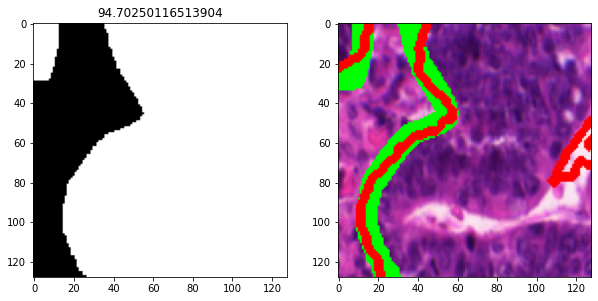

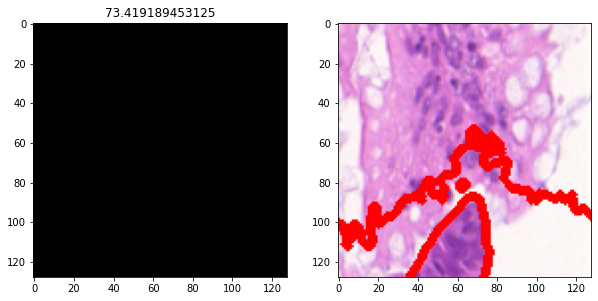

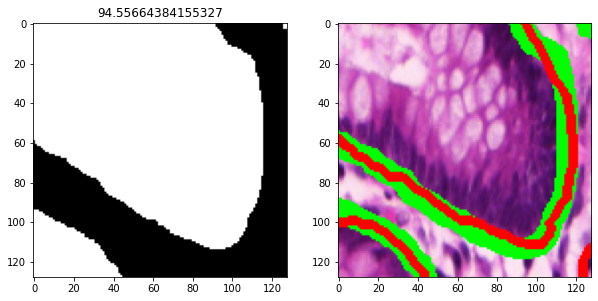

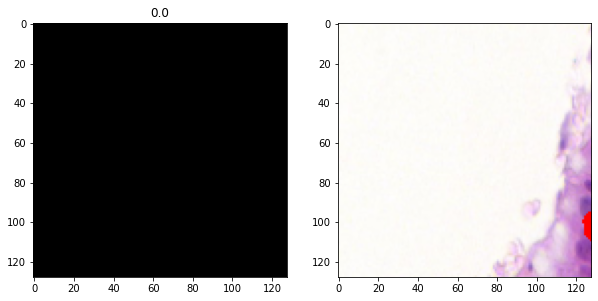

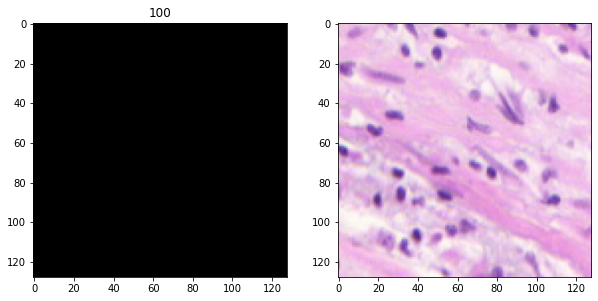

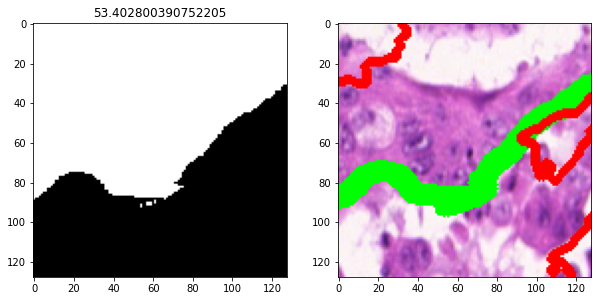

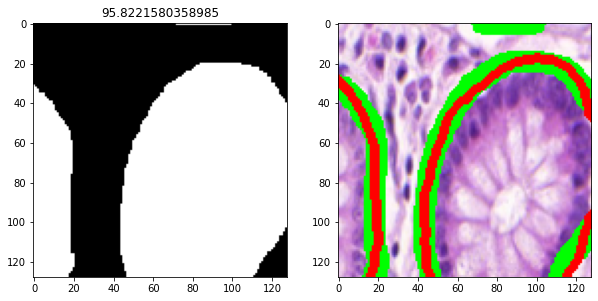

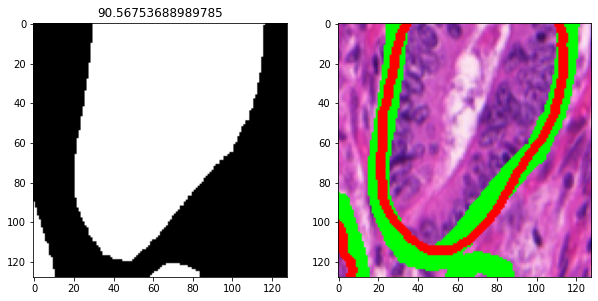

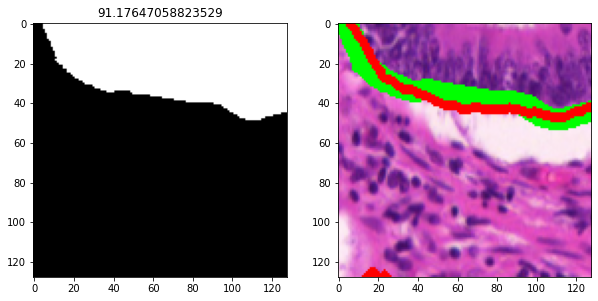

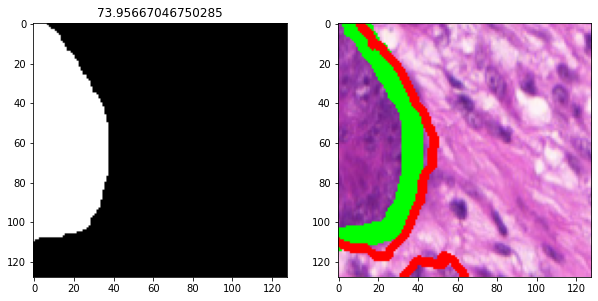

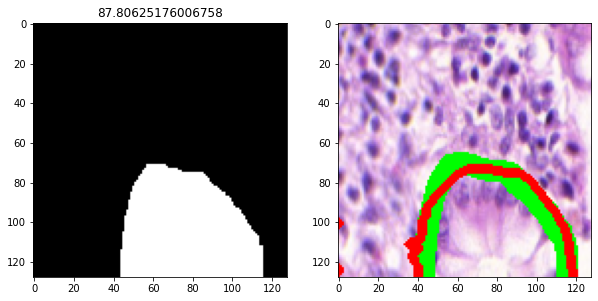

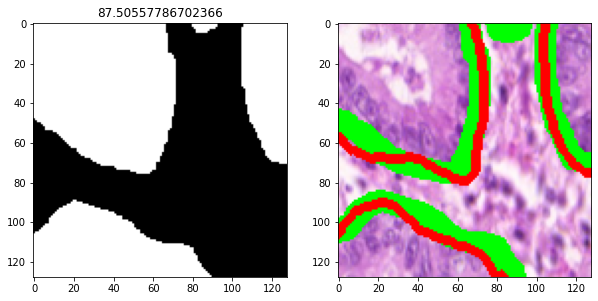

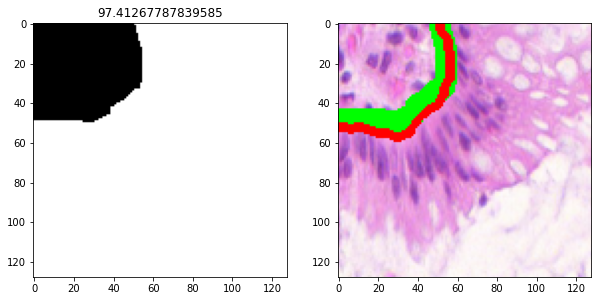

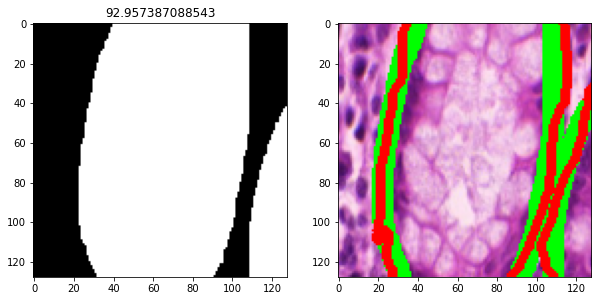

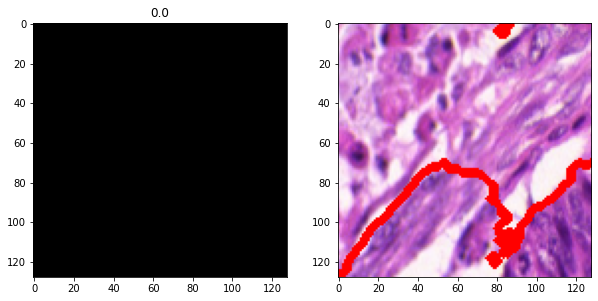

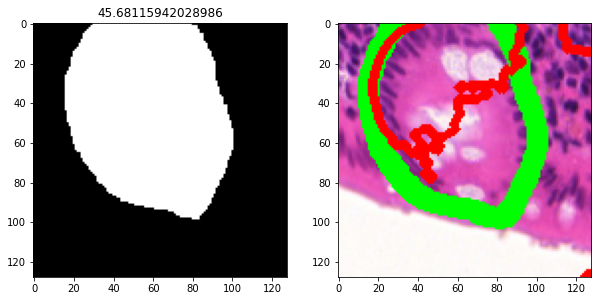

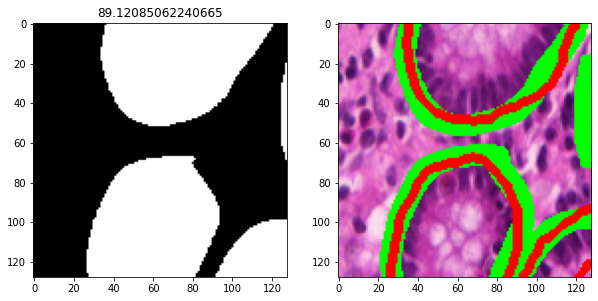

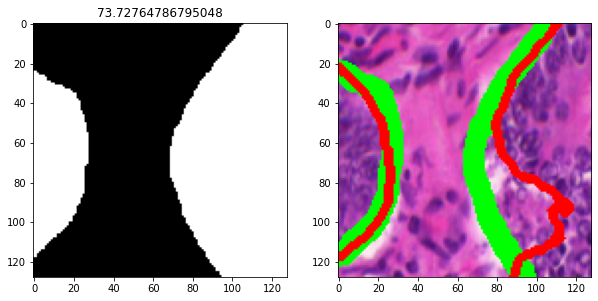

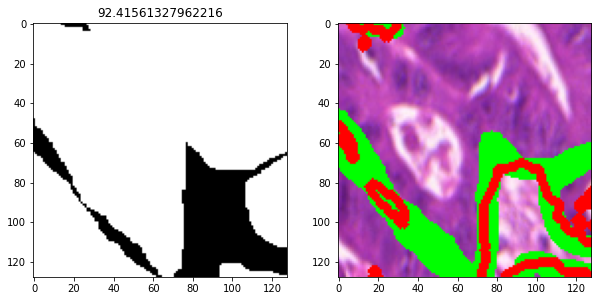

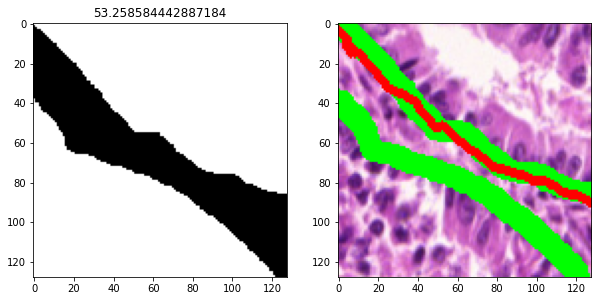

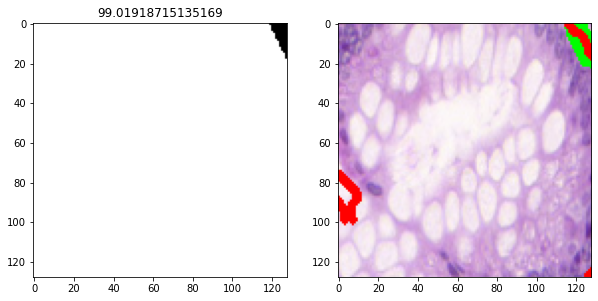

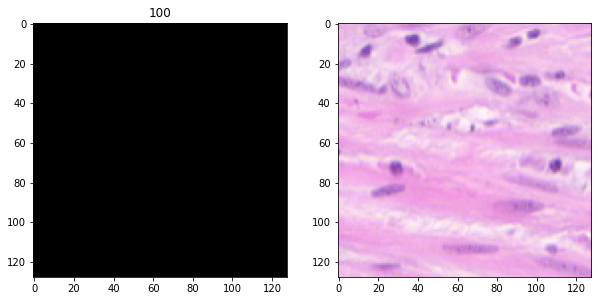

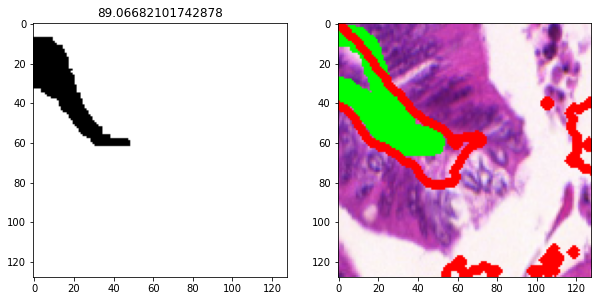

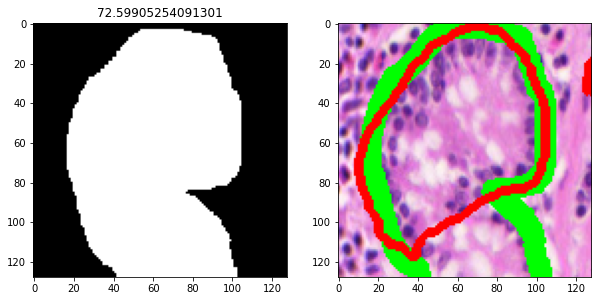

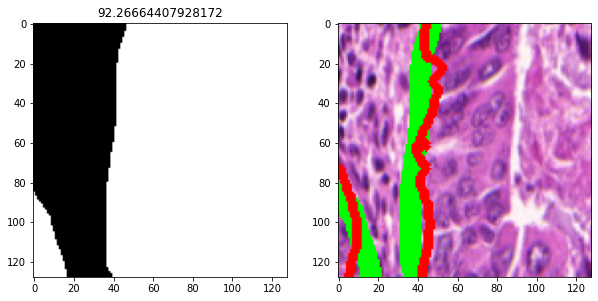

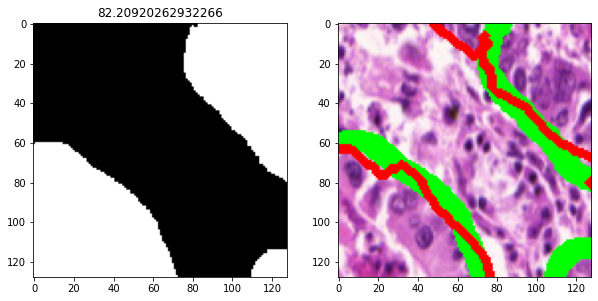

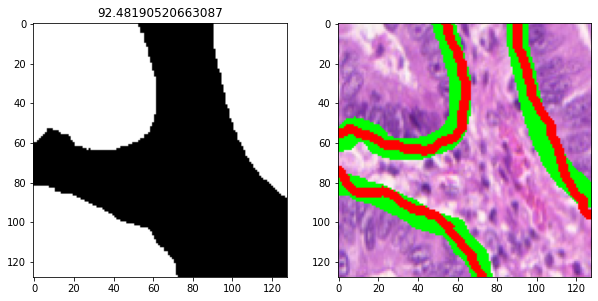

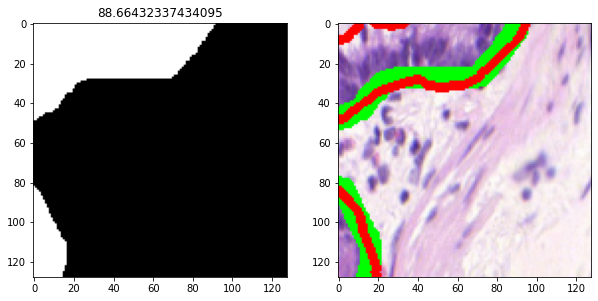

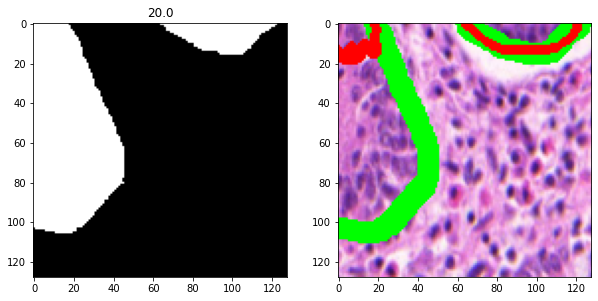

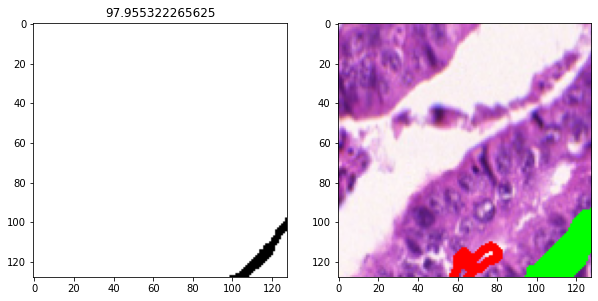

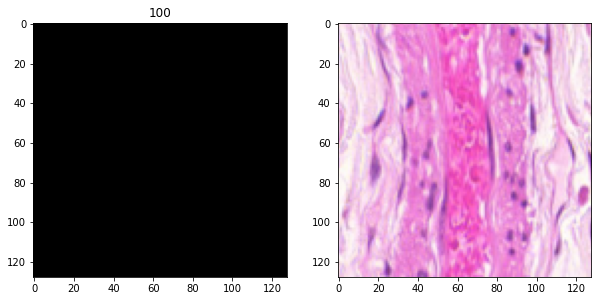

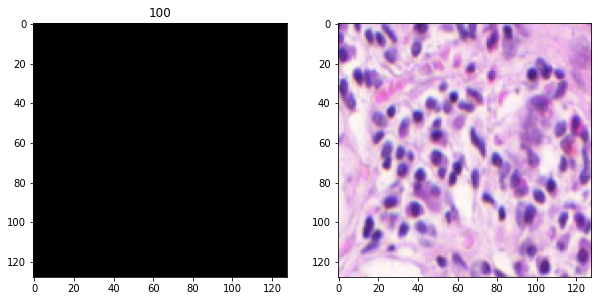

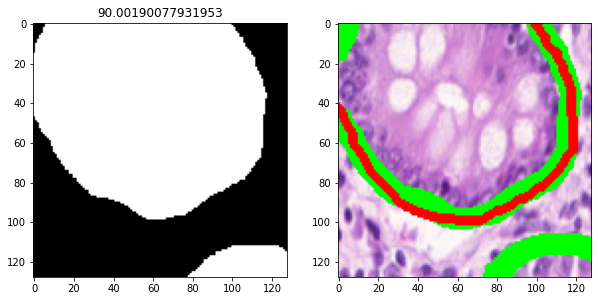

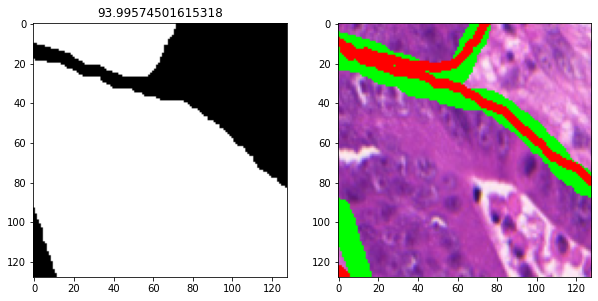

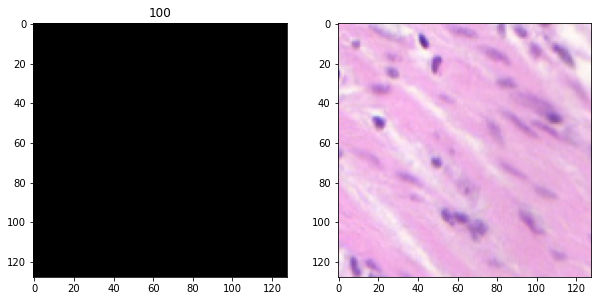

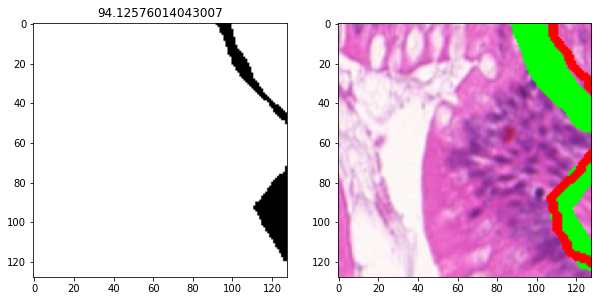

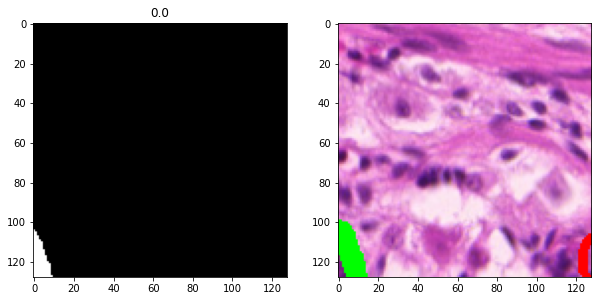

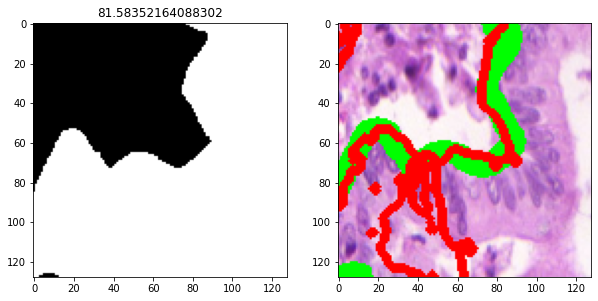

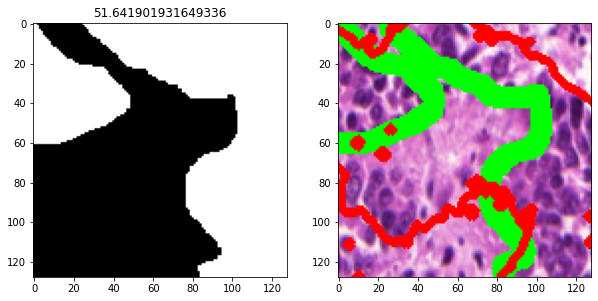

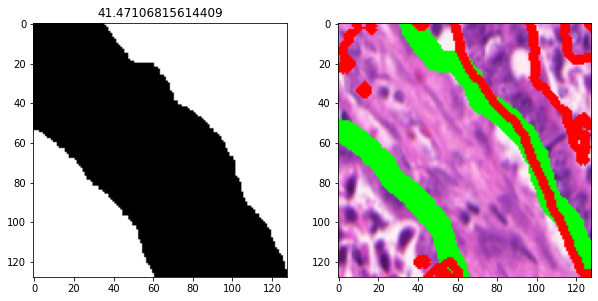

In [74]:
#displaying output
index=0
for image in X_test:
    test=image.reshape(1,128,128,3)
    mask=Y_test[index]
    mask=mask.astype(np.uint8)
    mask=mask*255
    image1=contour_img(x_test[index],mask,0)
    
    pred=model.predict(test)
    pred=pred.reshape(128,128)
    ret,pred_mask = cv2.threshold(pred,0.4,1,cv2.THRESH_BINARY)
    pred_mask=pred_mask*255
    pred_mask=pred_mask.astype(np.uint8)
    image2=contour_img(image1,pred_mask,1)
    mask=mask/255
    pred_mask=pred_mask/255
    fig=plt.figure(figsize=(10,20))
    a=fig.add_subplot(1,2,1)
    mask=mask.reshape(128,128)
    a.title.set_text(mean_iou(pred_mask,mask))
    a.imshow(mask.reshape(128,128),cmap="gray")
    a=fig.add_subplot(1,2,2)
    a.imshow(image1)
    '''
    a=fig.add_subplot(1,4,3)
    a.imshow(pred_mask.reshape(128,128),cmap="gray")
    a=fig.add_subplot(1,4,4)
    a.imshow(image2)
    '''
    index=index+1 

In [73]:
#calculating IOU score
def mean_iou(mask, pred):
    intersection = np.logical_and(mask,pred)
    union = np.logical_or(mask, pred)
    iou_score = np.sum(intersection) / np.sum(union)
    if(np.sum(union)==0):
        return 100
    return iou_score*100